## Iris Dataset: End-to-End EDA and Multinomial Logistic Regression

### Project Overview
This project provides a structured **Exploratory Data Analysis (EDA)** and builds a **Multinomial Logistic Regression Model** to classify the Iris species. It includes data visualization, correlation analysis, feature engineering, model training, evaluation, and hyperparameter tuning.

### Table of Contents
- [Domain Knowledge & Presentation Explanation](#domain-knowledge--presentation-explanation)
- [Why Logistic Regression?](#why-logistic-regression)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
- [Feature Engineering](#feature-engineering)
- [Modeling: Multinomial Logistic Regression](#modeling-multinomial-logistic-regression)
- [Hyperparameter Tuning](#hyperparameter-tuning)
- [Model Evaluation](#model-evaluation)
- [Model Selection & Conclusion](#model-selection--conclusion)
  

### Domain Knowledge & Presentation Explanation
- **Iris Dataset:** A popular dataset in ML with 150 samples of three species (*Setosa, Versicolor, Virginica*).
- **Importance:** Used for benchmarking ML algorithms.
- **Goal:** Predict species based on features (Sepal & Petal length/width).

### Why Logistic Regression?
- **Linear Regression is unsuitable** as it predicts continuous values.
- **Logistic Regression predicts probabilities** and works well for classification.
- **Multinomial Logistic Regression** handles multiple classes effectively.

### Exploratory Data Analysis (EDA)
#### Initial Data Exploration
- **Check Data Types & Structure:** Identify numerical & categorical features.
- **Summary Statistics:** Mean, median, variance, and spread of features.
- **Frequency Table:** Class distribution analysis.

#### Visualizations & When to Use Them
- **Column Plot (For Categorical Data):** Shows class distribution.
- **Scatter Plot (For Numerical Data):** Identifies relationships between numerical features.
- **Pair Plot (For Numerical Data):** Examines feature correlations.
- **Histogram (For Numerical Data):** Visualizes feature distributions.
- **Boxplot (For Numerical Data):** Detects outliers in the dataset.
- **Correlation Matrix (For Numerical Data):** Analyzes feature dependencies.

#### Encoding & Handling Data Issues
- **Encoding Techniques:** Use Label Encoding for target labels.
- **Handling Missing Values:** Check for and impute missing data.
- **Outlier Detection & Treatment:** Identify outliers using boxplots and remove/treat them accordingly.

### Feature Engineering
- **Feature Creation:** Generate new features if necessary.
- **Feature Selection:** Retain relevant features using correlation analysis.

### Modeling: Multinomial Logistic Regression
#### Splitting Data
- **Features & Target Separation:** Separating input features and output labels.
- **Train-Test Split:** 70% training, 30% testing to evaluate model performance.
- **Feature Scaling:** Standardization ensures optimal model performance.

#### Model Training
- **Multinomial Logistic Regression:**
  - `solver='saga'` ensures convergence with large datasets.
  - `multi_class='ovr'` for one-vs-rest classification.

### Hyperparameter Tuning
- **Grid Search:** Optimizes hyperparameters (`C` and `penalty`).
- **Regularization (L1, L2):** Prevents overfitting by penalizing large coefficients.

### Model Evaluation
- **Metrics Used:**
  - Accuracy, Precision, Recall, and F1-Score for performance analysis.
  - Confusion Matrix to evaluate classification correctness.
  - ROC Curve to assess the model’s probability predictions for multiple classes.
  - Correlation Matrix to further analyze feature importance.

### Model Selection & Conclusion
- **Best Model Selection:** Choose the optimal model based on accuracy and AUC scores.
- **Comparison with Other Models:** Evaluate Logistic Regression against other classifiers.
- **Final Remarks:** Key takeaways, limitations, and potential improvements.



---

## **Understanding the Column Names of the Iris Dataset (Domain Knowledge)**  

The **Iris dataset** is one of the most well-known datasets in machine learning and statistics. It contains measurements of **three different species of iris flowers**:  

- **Iris-setosa**  
- **Iris-versicolor**  
- **Iris-virginica**  

The dataset was introduced by **Ronald Fisher** in 1936 as an example of discriminant analysis.

---

### **Feature Descriptions (Columns in the Dataset)**  

The dataset consists of **4 numerical features** that describe the physical attributes of iris flowers:

| **Column Name**   | **Description** |
|------------------|----------------|
| `sepal_length`   | Length of the sepal (in cm) |
| `sepal_width`    | Width of the sepal (in cm) |
| `petal_length`   | Length of the petal (in cm) |
| `petal_width`    | Width of the petal (in cm) |
| `species`        | The species of the iris flower (`Iris-setosa`, `Iris-versicolor`, or `Iris-virginica`) |

---

### **What are Sepals and Petals?**
- **Sepals**: Outer protective leaves that enclose the flower before it blooms.  
- **Petals**: The colorful part of the flower that attracts pollinators.  


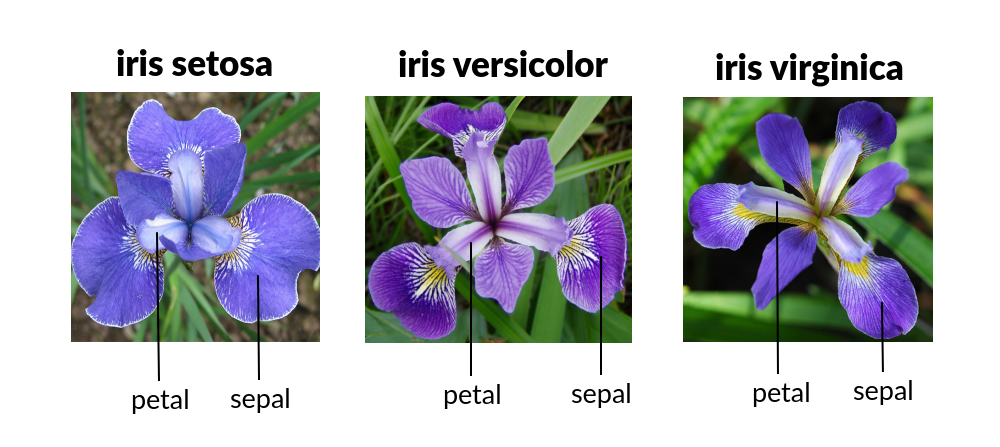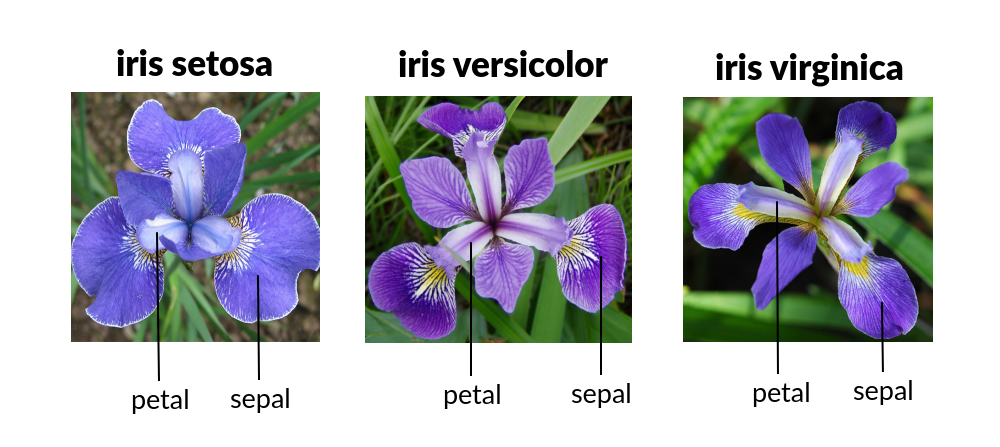
### **Why are These Features Important?**
#### **🔹 Sepal vs. Petal:**
- **Sepals** are generally larger and provide **structural support** to the flower.  
- **Petals** are smaller and more variable in size and shape.  

#### **🔹 Differentiating Species:**
- Different **iris species have distinct petal and sepal dimensions**.  
- These features help in building a **classification model** to identify flower species.

---


#### **Initial Data Exploration**
- **Check Data Types & Structure: Identify numerical & categorical features.**
- **Summary Statistics: Mean, median, variance, and spread of features.**
- **Frequency Table: Class distribution analysis.**

In [604]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [606]:
# Define proper column names
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

#load the data set with new column names
df=pd.read_csv(r"C:\Users\sriya\Downloads\iris.data.csv",names=column_names)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


---
### or,
- df.columns=["sepal_length","sepal_width","petal_length","petal_width","species"]

In [609]:
# Check the shape of the dataset
print("\n😎 Dataset Shape (Rows, Columns):")
df.shape


😎 Dataset Shape (Rows, Columns):


(150, 5)

In [611]:
print("\n First 5 rows of the data set:")
print("\n",df.head())


 First 5 rows of the data set:

    sepal_length  sepal_width  petal_length  petal_width   species   
0       5.1          3.5           1.4          0.2      Iris-setosa
1       4.9          3.0           1.4          0.2      Iris-setosa
2       4.7          3.2           1.3          0.2      Iris-setosa
3       4.6          3.1           1.5          0.2      Iris-setosa
4       5.0          3.6           1.4          0.2      Iris-setosa


In [613]:
print("\n😎 Lists all column names:")
print(df.columns) 


😎 Lists all column names:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'], dtype='object')


In [615]:
print("\n😎 Summary Statistics:") #For numeric variable
print("\n",df.describe().round())  # Shows mean, std, min, max, etc.


😎 Summary Statistics:

        sepal_length  sepal_width  petal_length  petal_width
count      150.0        150.0         150.0        150.0   
mean         6.0          3.0           4.0          1.0   
std          1.0          0.0           2.0          1.0   
min          4.0          2.0           1.0          0.0   
25%          5.0          3.0           2.0          0.0   
50%          6.0          3.0           4.0          1.0   
75%          6.0          3.0           5.0          2.0   
max          8.0          4.0           7.0          2.0   


In [617]:
print(df.describe(include='object')) # For object 

         species   
count           150
unique            3
top     Iris-setosa
freq             50


In [619]:
print("\n💕Dataset Information:")
df.info()  # Provides column data types, non-null counts, memory usage


💕Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [621]:
# Identify numerical and categorical columns

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(" Numerical Features:", numerical_features)
print(" Categorical Features:",categorical_features)


 Numerical Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
 Categorical Features: ['species']


In [623]:
# Frequency distribution
df.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [625]:
#or,
# Frequency table for categorical variables
for col in categorical_features:
    print(f"\nFrequency Table for {col}:")
    print(df[col].value_counts())


Frequency Table for species:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [627]:
#or,
# Class distribution (if applicable)
target_column = "species"  # Replace with your actual target column
if target_column in df.columns:
    print("\nClass Distribution:")
    print(df[target_column].value_counts(normalize=True) * 100)  # Percentage distribution


Class Distribution:
species
Iris-setosa        33.333333
Iris-versicolor    33.333333
Iris-virginica     33.333333
Name: proportion, dtype: float64


In [629]:
df.sepal_length.value_counts() # top mode means highest frequency 

sepal_length
5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
6.4     7
5.5     7
5.8     7
4.9     6
6.0     6
5.4     6
5.6     6
6.1     6
6.5     5
4.8     5
7.7     4
6.9     4
4.6     4
5.2     4
6.2     4
4.4     3
7.2     3
5.9     3
6.8     3
4.7     2
6.6     2
4.3     1
7.0     1
5.3     1
4.5     1
7.1     1
7.3     1
7.6     1
7.4     1
7.9     1
Name: count, dtype: int64

### Visualizations & When to Use Them
- Column Plot (For Categorical Data): Shows class distribution.
- Scatter Plot (For Numerical Data): Identifies relationships between numerical features.
- Pair Plot (For Numerical Data): Examines feature correlations.
- Histogram (For Numerical Data): Visualizes feature distributions.
- Boxplot (For Numerical Data): Detects outliers in the dataset.
- Correlation Matrix (For Numerical Data): Analyzes feature dependencies.

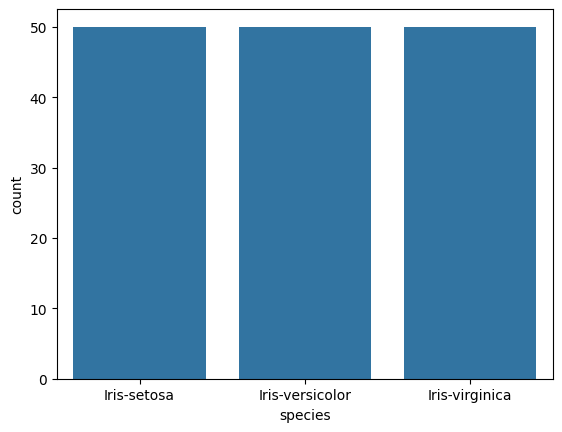

In [632]:
import seaborn as sns
# Column Plot (For Categorical Data): Shows class distribution.
sns.countplot(data=df,x='species');

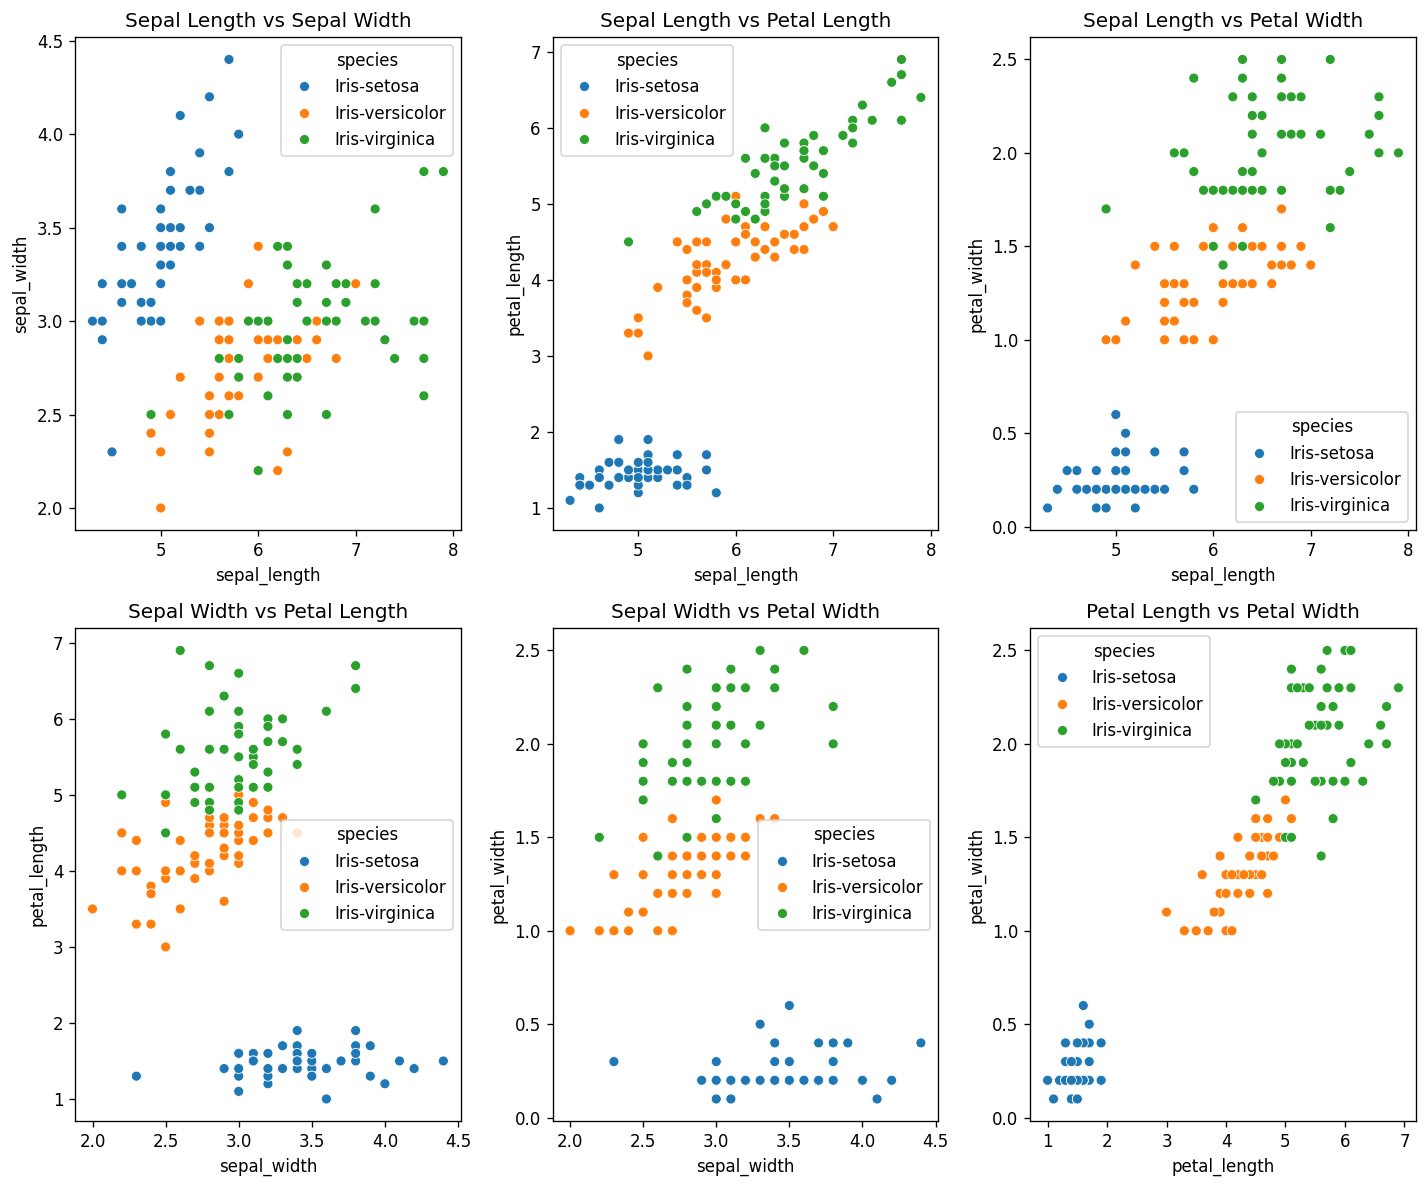

In [634]:
#Scatter Plot (For Numerical Data): Identifies relationships between numerical features.
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots for all feature comparisons
plt.figure(figsize=(12, 10),dpi=120)

# Sepal Length vs Sepal Width
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")
plt.title("Sepal Length vs Sepal Width")

# Sepal Length vs Petal Length
plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x="sepal_length", y="petal_length", hue="species")
plt.title("Sepal Length vs Petal Length")

# Sepal Length vs Petal Width
plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x="sepal_length", y="petal_width", hue="species")
plt.title("Sepal Length vs Petal Width")

# Sepal Width vs Petal Length
plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x="sepal_width", y="petal_length", hue="species")
plt.title("Sepal Width vs Petal Length")

# Sepal Width vs Petal Width
plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x="sepal_width", y="petal_width", hue="species")
plt.title("Sepal Width vs Petal Width")

# Petal Length vs Petal Width
plt.subplot(2, 3, 6)
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")
plt.title("Petal Length vs Petal Width")

plt.tight_layout()
plt.show()


### Explanation:
- No loop used – each scatter plot is created manually.
- plt.subplot(2, 3, i): Arranges plots in a 2-row, 3-column grid.
- Each sns.scatterplot() compares two different numerical features.
- hue="species": Colors points based on species for better differentiation.
- The hue parameter in seaborn.scatterplot() is used to color-code the points based on a categorical variable.



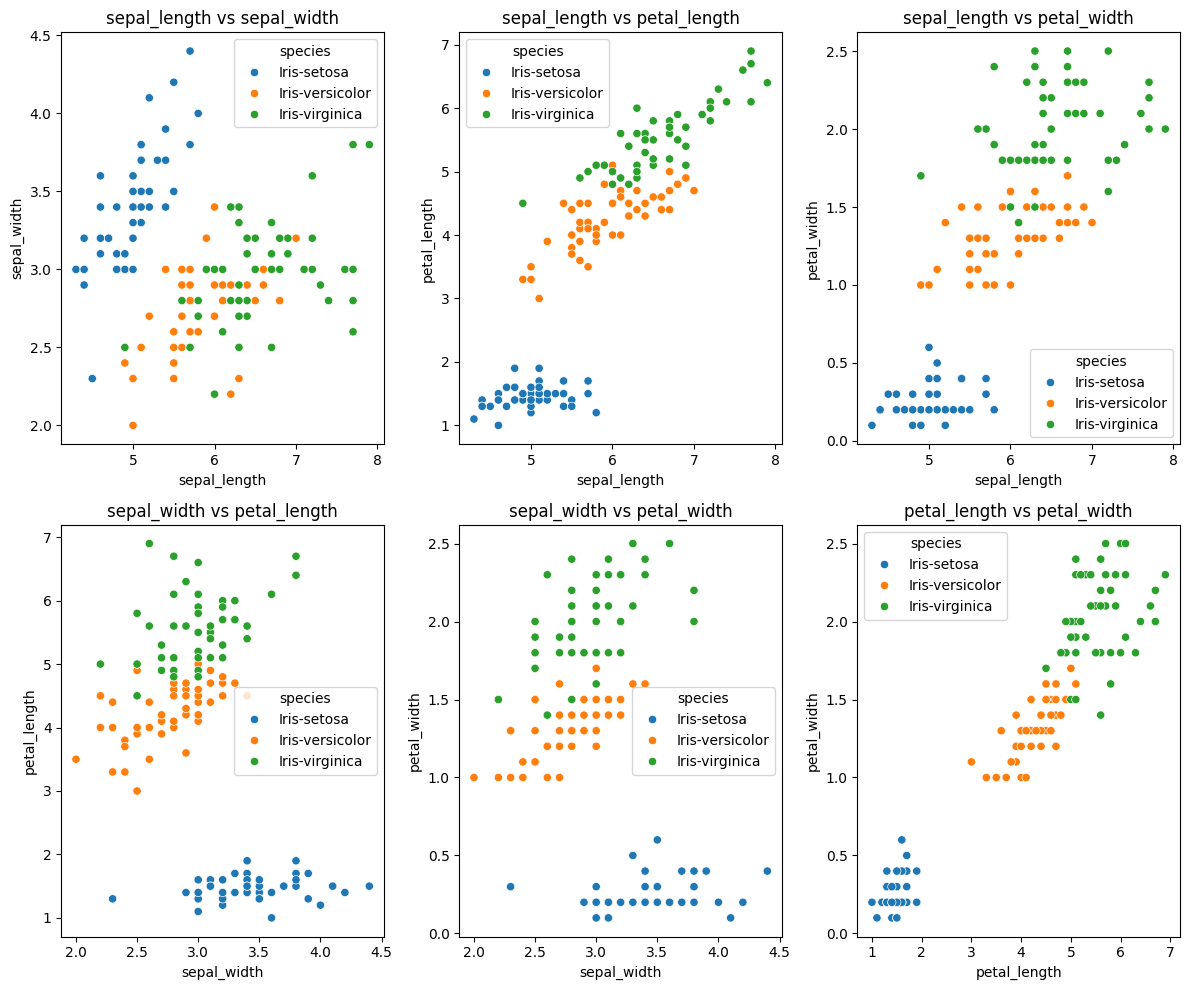

In [636]:
### or,
import seaborn as sns
import matplotlib.pyplot as plt

# Feature pairs for comparison
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
combinations = [(features[i], features[j]) for i in range(len(features)) for j in range(i + 1, len(features))]

# Set figure size
plt.figure(figsize=(12, 10))

# Loop through each feature pair and plot
for index, (x_feature, y_feature) in enumerate(combinations, start=1):
    plt.subplot(2, 3, index)
    sns.scatterplot(data=df, x=x_feature, y=y_feature, hue="species")
    plt.title(f"{x_feature} vs {y_feature}")

plt.tight_layout()
plt.show()


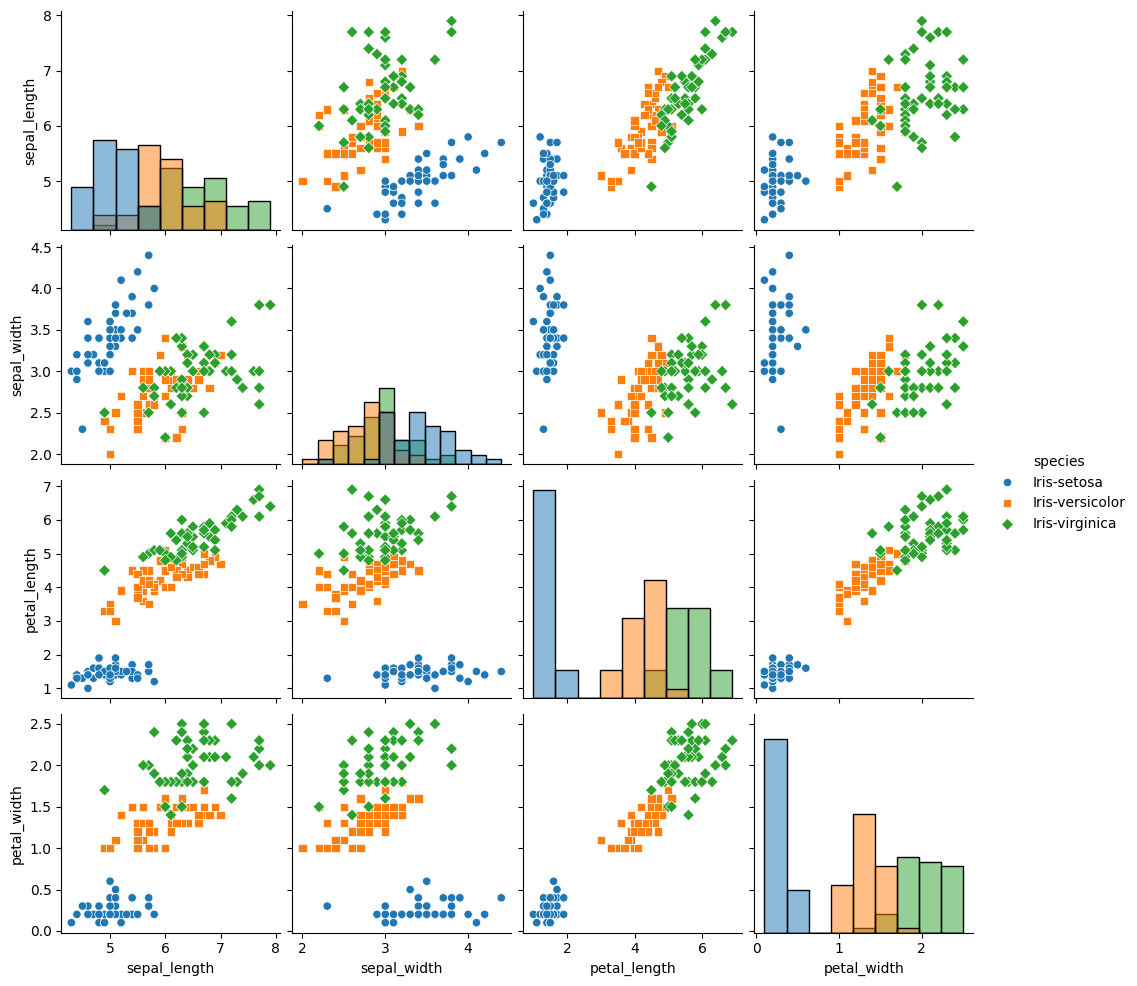

In [638]:
# Pair Plot (For Numerical Data): Examines feature correlations.
# Creating the pair plot
sns.pairplot(data=df, hue="species", diag_kind="hist", markers=["o", "s", "D"])

# Display the plot
plt.show()

---
- hue="species" → Colors the points based on species for better differentiation.
- markers=["o", "s", "D"] → Uses different marker styles for different species.
  - Setosa → "o" (circle)
  - Versicolor → "s" (square)
  - Virginica → "D" (diamond)

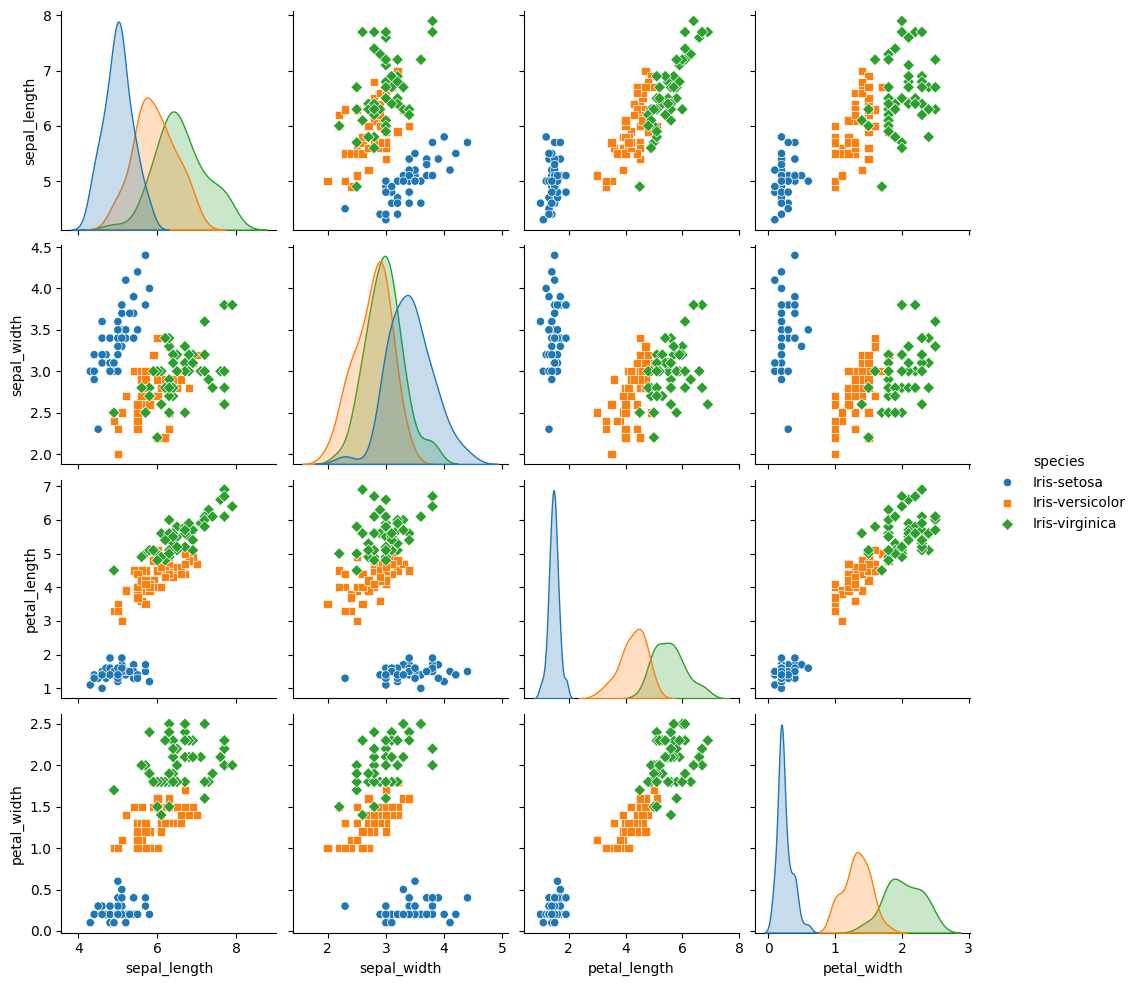

In [641]:
# Creating the pair plot using KDE for diagonal plots
sns.pairplot(data=df, hue="species", diag_kind="kde", height=2.5, markers=["o", "s", "D"])

plt.show()

---
- diag_kind="kde" → Uses a Kernel Density Estimate (KDE) plot instead of a histogram for the diagonal plots.
- hue="species" → Colors the data points based on species.

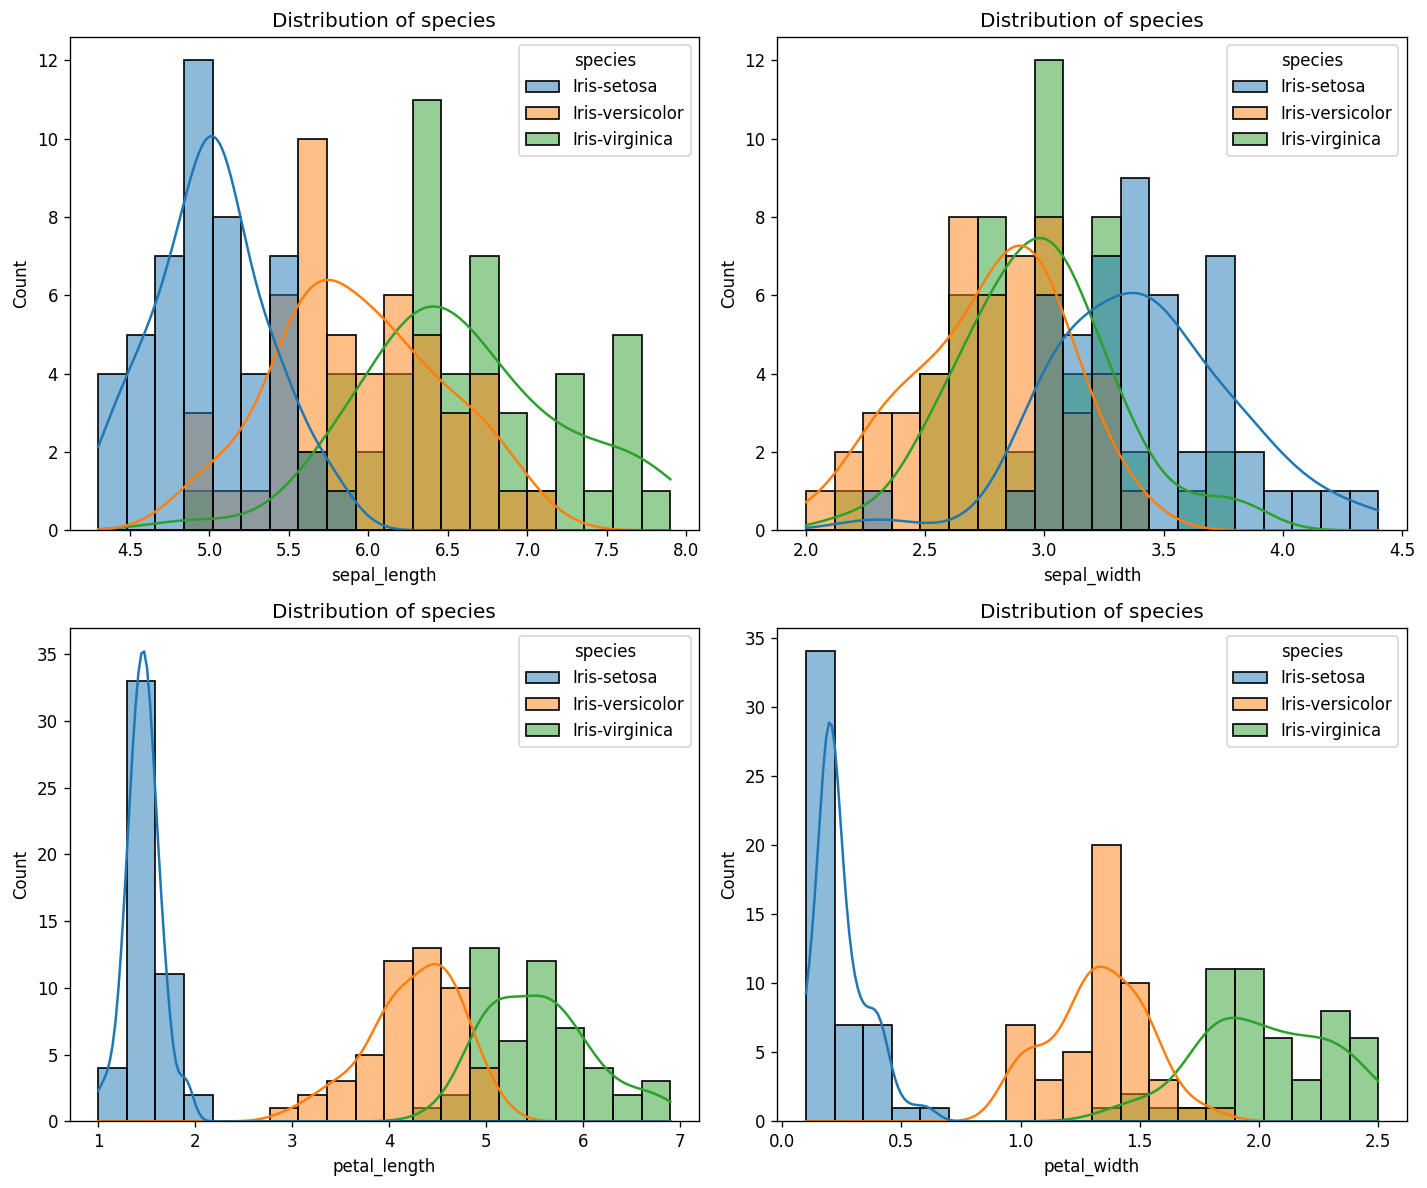

In [643]:

# Define numerical columns
numerical_features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Set up the figure size
plt.figure(figsize=(12, 10), dpi=120)

# Loop through numerical features and create histograms
for i, feature in enumerate(numerical_features, 1):#enumerate() is used to loop over an iterable while keeping track of the index.
    plt.subplot(2, 2, i)  # 2x2 grid
    sns.histplot(df, x=feature, hue="species", kde=True, bins=20)
    plt.title(f"Distribution of {col}")  # Format title

plt.tight_layout()  # Adjust layout
plt.show()


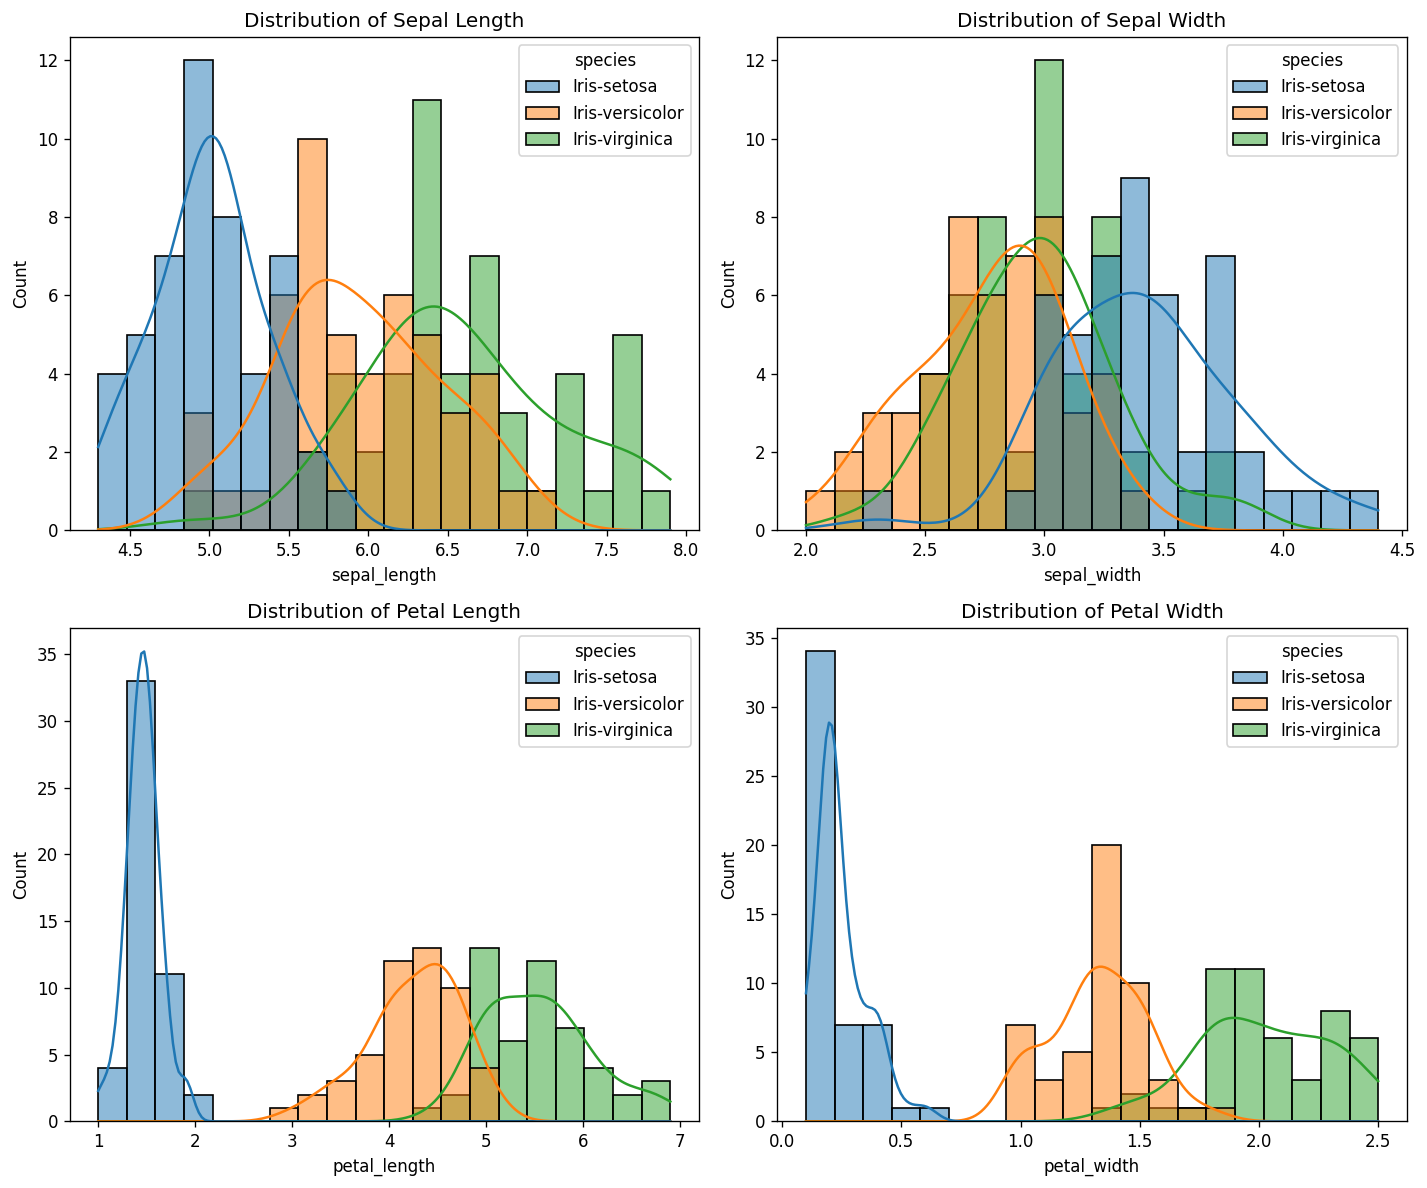

In [644]:
#or,
# Set the figure size
plt.figure(figsize=(12, 10), dpi=120)

# Sepal Length Histogram
plt.subplot(2, 2, 1)
sns.histplot(df, x="sepal_length", hue="species", kde=True, bins=20)
plt.title("Distribution of Sepal Length")

# Sepal Width Histogram
plt.subplot(2, 2, 2)
sns.histplot(df, x="sepal_width", hue="species", kde=True, bins=20)
plt.title("Distribution of Sepal Width")

# Petal Length Histogram
plt.subplot(2, 2, 3)
sns.histplot(df, x="petal_length", hue="species", kde=True, bins=20)
plt.title("Distribution of Petal Length")

# Petal Width Histogram
plt.subplot(2, 2, 4)
sns.histplot(df, x="petal_width", hue="species", kde=True, bins=20)
plt.title("Distribution of Petal Width")

plt.tight_layout()
plt.show()


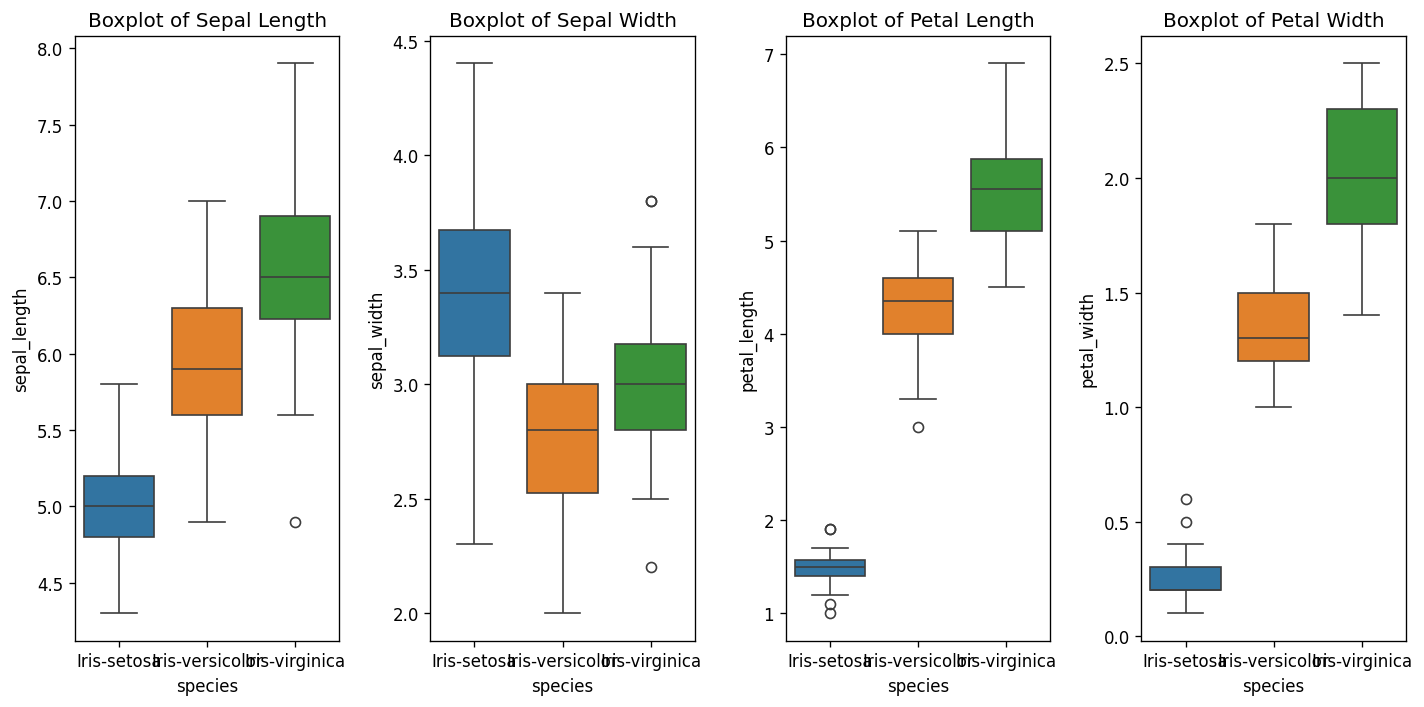

In [645]:
# Boxplot (For Numerical Data): Detects outliers in the dataset.
# Set figure size
plt.figure(figsize=(12, 6), dpi=120)

# Boxplot for Sepal Length
plt.subplot(1, 4, 1)
sns.boxplot(data=df, y="sepal_length", x="species",hue="species")
plt.title("Boxplot of Sepal Length")

# Boxplot for Sepal Width
plt.subplot(1, 4, 2)
sns.boxplot(data=df, y="sepal_width", x="species",hue="species")
plt.title("Boxplot of Sepal Width")

# Boxplot for Petal Length
plt.subplot(1, 4, 3)
sns.boxplot(data=df, y="petal_length", x="species",hue="species")
plt.title("Boxplot of Petal Length")

# Boxplot for Petal Width
plt.subplot(1, 4, 4)
sns.boxplot(data=df, y="petal_width", x="species",hue="species")
plt.title("Boxplot of Petal Width")

plt.tight_layout()
plt.show()


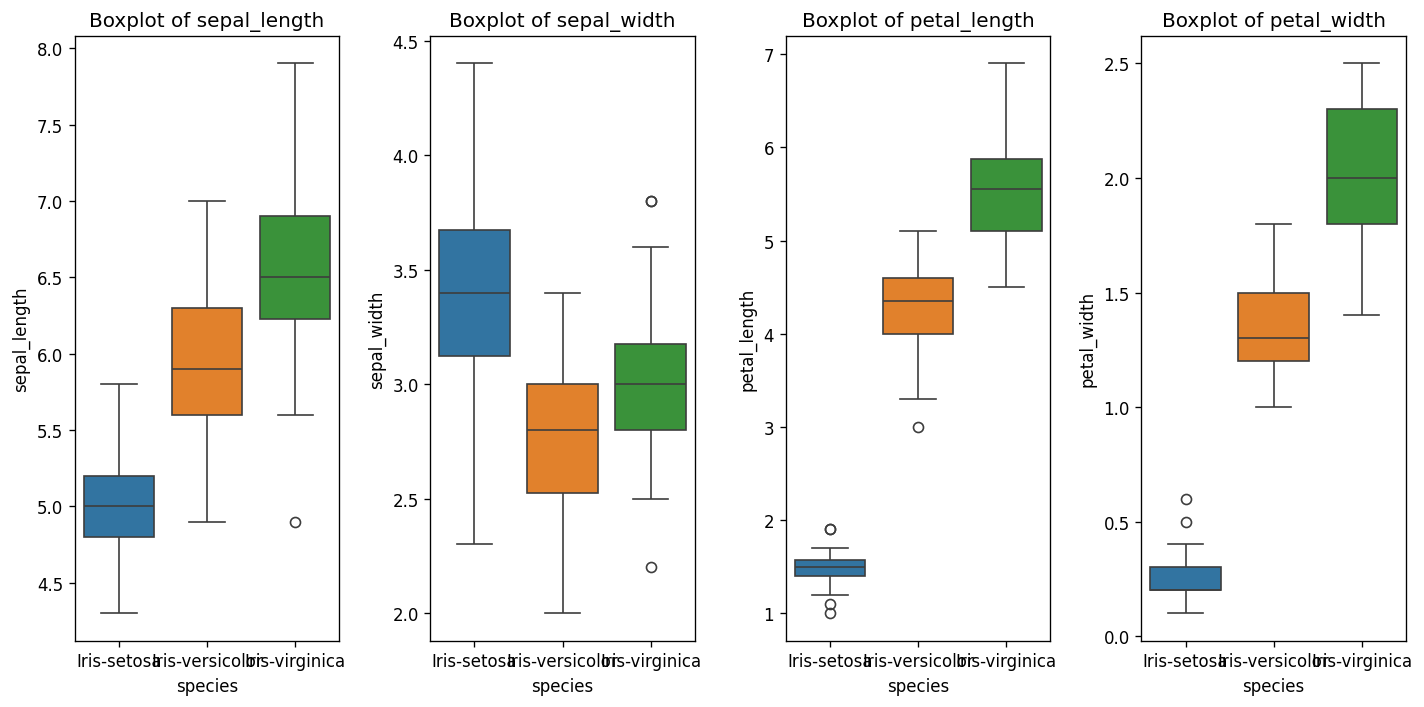

In [646]:
#or, 
# Boxplot (For Numerical Data): Detects outliers in the dataset.

# Define numerical features
numerical_features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Set figure size
plt.figure(figsize=(12, 6), dpi=120)

# Loop through features and create boxplots
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 4, i)  # Arrange plots in 1 row, 4 columns
    sns.boxplot(data=df, y=feature, x="species",hue="species")
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()


In [647]:
#Correlation Matrix (For Numerical Data): Analyzes feature dependencies.
df.corr(numeric_only=True).round(2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


🔍 Interpretation:
- Values close to +1 indicate a strong positive correlation.
- Values close to -1 indicate a strong negative correlation.
- Values near 0 indicate no significant correlation.
- Helps in feature selection by identifying redundant features.

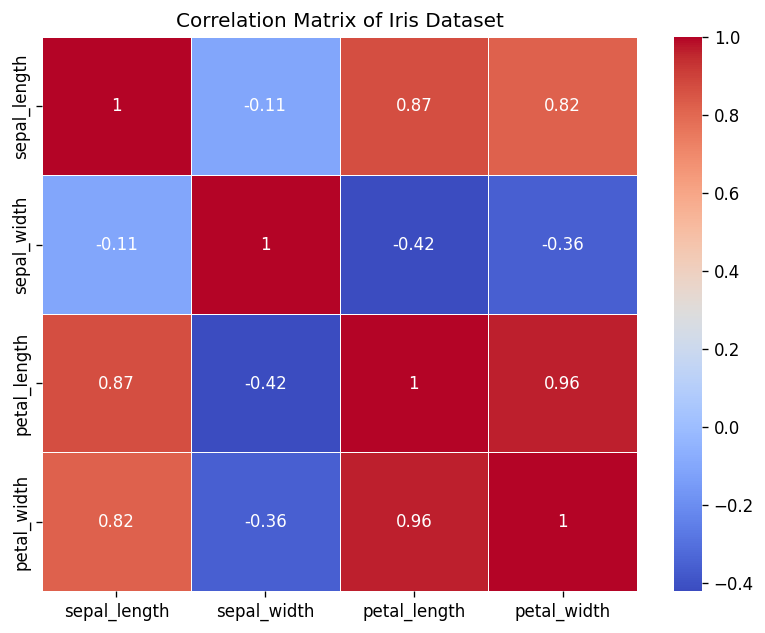

In [652]:
# Set the figure size
plt.figure(figsize=(8, 6), dpi=120)

# Plot the heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)

# Set the title
plt.title("Correlation Matrix of Iris Dataset")
# Show the plot
plt.show()

### Encoding & Handling Data Issues
- Outlier Detection & Treatment: Identify outliers using boxplots and remove/treat them accordingly.
- Handling Missing Values: Check for and impute missing data.
- Encoding Techniques: Use Label Encoding for target labels.

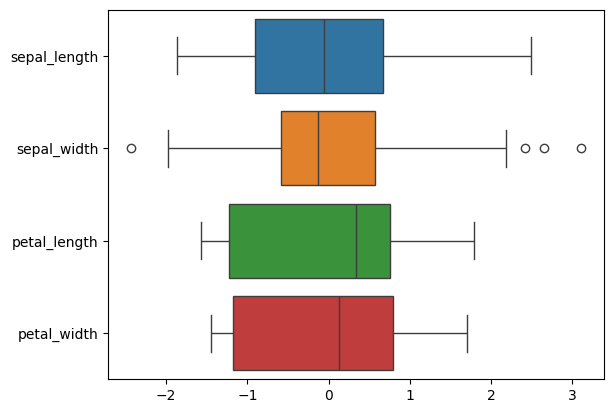

In [656]:
# Outlier Detection & Treatment: Identify outliers using boxplots and remove/treat them accordingly.
from edahelp import boxplots
boxplots(df)

- Since the IQR-based capping did not remove all outliers, we can try Winsorization or Z-score filtering to handle extreme values more effectively.
-  Method 1: Winsorization :Winsorization replaces extreme outliers with the closest non-outlier values

In [662]:
from scipy.stats.mstats import winsorize

def winsorize_outliers(df, columns, limits=(0.05, 0.05)):
    """Apply Winsorization to reduce the effect of outliers."""
    for col in columns:
        df[col] = winsorize(df[col], limits=limits)
    return df

# Apply Winsorization
df = winsorize_outliers(df, ["sepal_length", "sepal_width", "petal_length", "petal_width"])


or,
- Method 2: Z-Score Filtering: The **Z-score** measures how many standard deviations a data point is from the mean.m
- Steps:
- 1. Compute the Z-score for each value using the formula:$ Z = \frac{X - \mu}{\sigma} $
   where:- $ X \ $ is the data point,- $  \mu $ is the mean,- $\ \sigma $ is the standard deviation.
 - 2. Remove values with a **Z-score greater than 3 or less than -3**, as they are considered outliers.

In [665]:
#Removes extreme values based on standard deviation.
from scipy.stats import zscore

def remove_outliers_zscore(df, columns, threshold=3):
    """Removes rows where the absolute Z-score is greater than the threshold."""
    df_filtered = df[(df[columns].apply(zscore).abs() < threshold).all(axis=1)]
    return df_filtered

# Apply Z-score filtering
df = remove_outliers_zscore(df, ["sepal_length", "sepal_width", "petal_length", "petal_width"])


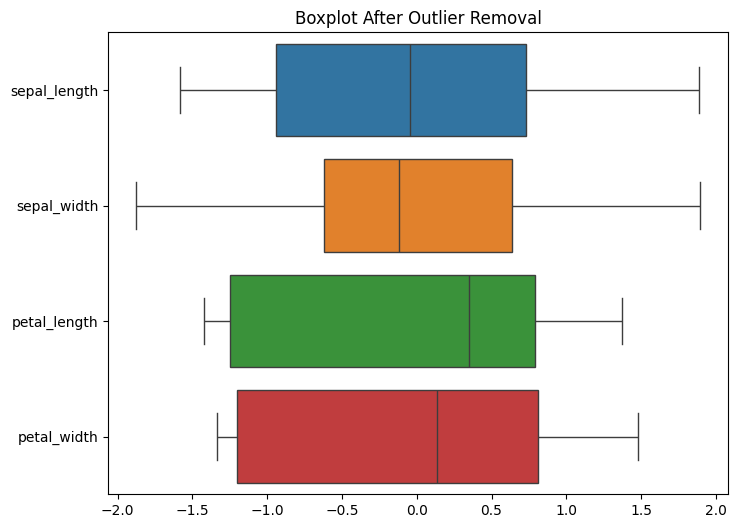

In [667]:
# Let's visualize the boxplot again to check if the outliers are still present after applying Winsorization or Z-score filtering.
# Reimport required libraries

import matplotlib.pyplot as plt #matplotlib.pyplot → Used to create plots.
import seaborn as sns     #seaborn → Used for visualizing data with better aesthetics.
import pandas as pd     #pandas → Used for handling data in DataFrame format.
from sklearn.preprocessing import StandardScaler #StandardScaler→ Used to scale numerical data so that all features have mean 0 and standard deviation 1.

#boxplots(df) :This function takes a pandas DataFrame (df) as input.
#It scales numeric columns and plots a boxplot to detect outliers.
def boxplots(df): 
    """Function to scale float data and create boxplots for outlier detection."""
    
    scaler = StandardScaler() #StandardScaler() → Creates a scaler object that transforms numeric data.
    df_num = df.select_dtypes(include='number')  #df.select_dtypes(include='number') → Selects only numeric columns (ignores categorical/text columns).
    
    df_num_scaled = scaler.fit_transform(df_num.to_numpy())
    df_num_scaled = pd.DataFrame(df_num_scaled, columns=df_num.columns)
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_num_scaled, orient='h')
    plt.title("Boxplot After Outlier Removal")
    plt.show()

# Call the function again to check for remaining outliers
boxplots(df)


### How to Remove Outliers in a Dataset?
- Outliers can be removed using various statistical techniques. Below are some common methods to detect and remove them:
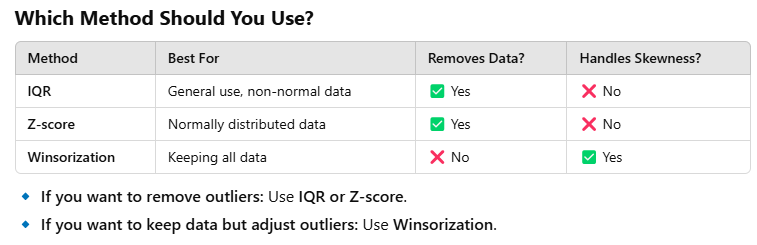

In [670]:
# Handling Missing Values: Check for and impute missing data.
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [672]:
 #Encoding Techniques: Use Label Encoding for target labels.
 #**1️⃣ One-Hot Encoding (OHE)**
from sklearn.preprocessing import OneHotEncoder

# Add target variable
#df['species'] = iris.target

# Convert species labels (0, 1, 2) back to original names
#df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Apply One-Hot Encoding
#df_encoded = pd.get_dummies(df, columns=['species'])

# Display the transformed dataset
print(df_encoded.head())

   sepal_length  sepal_width  petal_length  petal_width
0       5.1          3.5           1.4          0.2    
1       4.9          3.0           1.4          0.2    
2       4.7          3.2           1.3          0.2    
3       4.6          3.1           1.5          0.2    
4       5.0          3.6           1.4          0.2    


- If we want the species column to stay in numeric form (0, 1, 2) rather than one-hot encoded format, replace get_dummies() with Label Encoding using LabelEncoder from sklearn.
- Multiple columns with 0/1(One-Hot Encoding (OHE))
- Single column with numeric values( Label Encoding)

In [675]:
#Label Encoding	Converts categories into numbers (0,1,2,...):Single column with numeric values
from sklearn.preprocessing import LabelEncoder

# Add target variable (species)
#df['species'] = iris.target  # Already in numeric format (0, 1, 2)

# Alternative method: If species were text, we encode it back to numbers
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])  

# Display the transformed dataset
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0       5.1          3.5           1.4          0.2         0   
1       4.9          3.0           1.4          0.2         0   
2       4.7          3.2           1.3          0.2         0   
3       4.6          3.1           1.5          0.2         0   
4       5.0          3.6           1.4          0.2         0   


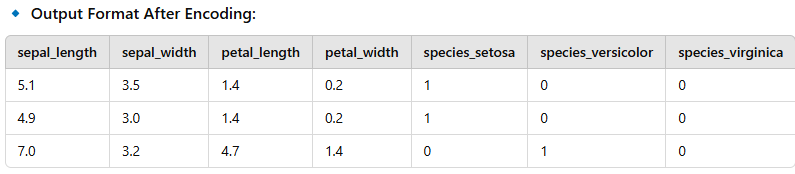

---
#### Types of Encoding for Categorical Features
### **1️⃣ One-Hot Encoding (OHE)**
 - **df_encoded = pd.get_dummies(df, columns=['species'], drop_first=True)**

✅ Use Case:
- Converts categorical data into binary (0/1) columns.
- Best for nominal categories (e.g., colors: Red, Blue, Green).

### **2️⃣ Label Encoding**
- **from sklearn.preprocessing import LabelEncoder**
- **le = LabelEncoder()**
- **df['species_encoded'] = le.fit_transform(df['species'])**

✅Use Case: 
- Assigns integer values (0,1,2...) to categories.
- Works well for ordinal categories (e.g., Low, Medium, High).

### **3️⃣ Ordinal Encoding** 
- **from sklearn.preprocessing import OrdinalEncoder**
- **encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])**
- **df[['risk_level_encoded']] = encoder.fit_transform(df[['risk_level']])**

✅ Use Case:
- Used when categories have an inherent order (e.g., Education Level: High School < Bachelor's < Master's).

### **4️⃣ Target Encoding (Mean Encoding)**
- **df['species_encoded'] = df.groupby('species')['petal_length'].transform('mean')**

✅ Use Case:

Assigns the mean of the target variable to each category.
Best for high-cardinality categorical features (e.g., Customer IDs).

---
---
### ⚖️ Weight of Evidence (WOE) & Information Value (IV)

#### **📌 What is WOE (Weight of Evidence)?**
WOE measures the relationship between categorical features and the target variable in **binary classification**.  
It calculates the **log odds ratio** for each category.

#### **📌 WOE Formula**

$WOE = \ln \left( \frac{\% \text{ of good cases in category}}{\% \text{ of bad cases in category}} \right)$


#### **✅ Why is WOE Useful?**
- Handles categorical data **without creating too many features** (like One-Hot Encoding).
- Helps **detect relationships** between independent and target variables.
- Commonly used in **credit scoring models and risk assessments**.

---

#### ✅ Modified WOE Calculation for the Iris Dataset
##### Convert species to binary classification (Iris-setosa = 1, Others = 0)
- **df['target'] = np.where(df['species'] == 'Iris-setosa', 1, 0)**

#### Select a categorical feature (for WOE, we must convert numerical features into bins)
- df['petal_length_bin'] = pd.qcut(df['petal_length'], q=4, labels=['low', 'medium', -'high', 'very_high'])

#### Function to calculate WOE
```
def calculate_woe(df, feature, target):
     df_woe = df.groupby(feature)[target].agg(['count', 'sum'])
     df_woe.columns = ['total', 'good']
     df_woe['bad'] = df_woe['total'] - df_woe['good']
     df_woe['good_dist'] = df_woe['good'] / df_woe['good'].sum()
     df_woe['bad_dist'] = df_woe['bad'] / df_woe['bad'].sum()
     df_woe['woe'] = np.log(df_woe['good_dist'] / df_woe['bad_dist'])
     return df_woe[['woe']]
```

#### Apply WOE function on the binned feature
```
df_woe = calculate_woe(df, 'petal_length_bin', 'target')
Print(df_woe)

```
---
##### 🔍 Explanation:
```
Convert Multi-Class to Binary

Since WOE is mainly used for binary classification, we convert the target variable:
"Iris-setosa" → 1
Other species → 0
Binning a Numerical Feature

WOE requires categorical variables, so we bin petal_length into 4 categories (low, medium, high, very_high) using pd.qcut().
This helps analyze the relationship between petal length and whether a flower is Iris-setosa.
Applying WOE Calculation

Group the data by petal_length_bin
Compute the number of good (1) and bad (0) cases
Calculate WOE values using log odds ratio
```

#### Feature Engineering
Let's perform Feature Engineering on the Iris dataset before modeling. This involves:

- Feature Creation: Generate new features if necessary.
- 1️⃣ Feature Creation:
- Generate new features that might add value to the model.
- Examples:
- Petal Area = petal_length × petal_width
- Sepal Area = sepal_length × sepal_width

In [682]:
### 🔹 Feature Creation: Generate New Features
df['petal_area'] = df['petal_length'] * df['petal_width']
df['sepal_area'] = df['sepal_length'] * df['sepal_width']

In [684]:


# Adjust settings to ensure all columns are visible in the output
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set the display width to a larger value
pd.set_option('display.colheader_justify', 'center')  # Optional: align column headers to center

# Display the first 5 rows of the DataFrame
print(df.head())



   sepal_length  sepal_width  petal_length  petal_width  species  petal_area  sepal_area
0       5.1          3.5           1.4          0.2         0        0.28        17.85  
1       4.9          3.0           1.4          0.2         0        0.28        14.70  
2       4.7          3.2           1.3          0.2         0        0.26        15.04  
3       4.6          3.1           1.5          0.2         0        0.30        14.26  
4       5.0          3.6           1.4          0.2         0        0.28        18.00  


- 2️⃣Feature Selection: Retain relevant features using correlation analysis.
- Identify and retain relevant features.
- Use correlation analysis to drop redundant features.

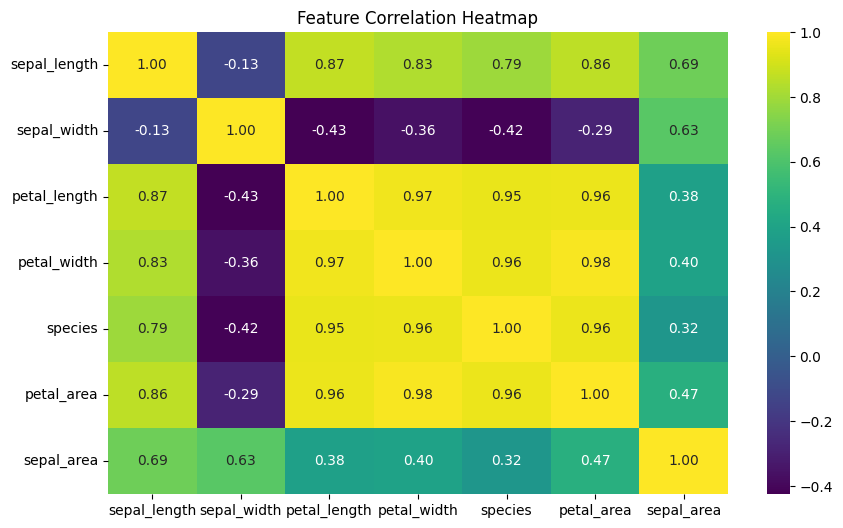

In [687]:
### 🔹 Feature Selection: Correlation Analysis
plt.figure(figsize=(10,6))

# Create the heatmap with a new colormap
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')

plt.title("Feature Correlation Heatmap")
plt.show()

In [689]:
# Calculate the correlation matrix directly from the DataFrame
corr_matrix = df.corr()

# Find highly correlated features (absolute correlation > 0.85)
threshold = 0.98
high_corr_pairs = np.where(abs(corr_matrix) > threshold)

# Create a list of highly correlated feature pairs, excluding self-correlations
high_corr_pairs = [
    (corr_matrix.index[i], corr_matrix.columns[j])
    for i, j in zip(*high_corr_pairs)
    if i != j
]

print("Highly Correlated Feature Pairs:", high_corr_pairs)


Highly Correlated Feature Pairs: [('petal_width', 'petal_area'), ('petal_area', 'petal_width')]


In [691]:
print(df.columns)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'petal_area', 'sepal_area'], dtype='object')


In [693]:
# Drop highly correlated/redundant features (if necessary)
df = df.drop(columns=['petal_area','petal_width'])  # Example

# Display the final dataset
print(df.head())

   sepal_length  sepal_width  petal_length  species  sepal_area
0       5.1          3.5           1.4         0        17.85  
1       4.9          3.0           1.4         0        14.70  
2       4.7          3.2           1.3         0        15.04  
3       4.6          3.1           1.5         0        14.26  
4       5.0          3.6           1.4         0        18.00  


### Modeling: Multinomial Logistic Regression
#### Splitting Data
- **Features & Target Separation:** Separating input features and output labels.
- **Train-Test Split:** 70% training, 30% testing to evaluate model performance.
- **Feature Scaling:** Standardization ensures optimal model performance.


In [695]:
#Preprocessing
#Features & Target Separation:** Separating input features and output labels.

X = df.drop(columns=['species'])  # Features
y = df['species']  # Target


In [698]:
#Train-Test Split:** 70% training, 30% testing to evaluate model performance.
#global parameter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [764]:
#Feature Scaling:** Standardization ensures optimal model performance.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



### Model Training
- **Multinomial Logistic Regression:**
  - `solver='saga'` ensures convergence with large datasets.
  - `multi_class='ovr'` for one-vs-rest classification.


In [767]:
#Modeling: Multinomial Logistic Regression with ovr Solver
#Train the model using the One-vs-Rest strategy (ovr) and the saga solver:

from sklearn.linear_model import LogisticRegression

# Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='saga', max_iter=500)
model.fit(X_train, y_train)

# Model predictions
y_pred = model.predict(X_test)


C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


## Hyperparameter Tuning
- **Grid Search:** Optimizes hyperparameters (`C` and `penalty`).
- **Regularization (L1, L2):** Prevents overfitting by penalizing large coefficients.


Let’s perform hyperparameter tuning for your logistic regression model to optimize parameters like C (regularization strength) and penalty (L1 or L2). We’ll use Grid Search for this step. Afterward, we’ll evaluate the tuned model using your chosen metrics.

In [772]:
#Hyperparameter Tuning with Grid Search
#Here’s how we can conduct hyperparameter tuning:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Set the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strengths to test
    'penalty': ['l1', 'l2'],  # Regularization types (L1 and L2)
    'solver': ['saga']        # SAGA works with both L1 and L2 penalties
}

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=500, multi_class='multinomial')

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}


C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [773]:
#Train the Model with Optimal Parameters
#Once the best hyperparameters are found, retrain the model:
# Train the final model with the best hyperparameters
final_model = LogisticRegression(
    C=best_params['C'], 
    penalty=best_params['penalty'], 
    solver=best_params['solver'], 
    max_iter=500, 
    multi_class='multinomial'
)
final_model.fit(X_train, y_train)


C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, max_iter=500, multi_class='multinomial', penalty='l1',
                   solver='saga')

## Model Evaluation
- **Metrics Used:**
  - Accuracy, Precision, Recall, and F1-Score for performance analysis.
  - Confusion Matrix to evaluate classification correctness.
  - ROC Curve to assess the model’s probability predictions for multiple classes.
  - Correlation Matrix to further analyze feature importance.

In [777]:
#After training the model, evaluate its performance using your chosen metrics.

#Accuracy, Precision, Recall, and F1-Score:
# Predictions and classification report
y_pred = final_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



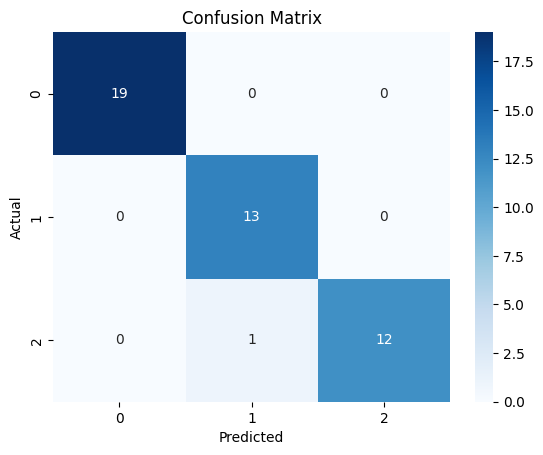

In [779]:
#Confusion Matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=final_model.classes_, yticklabels=final_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


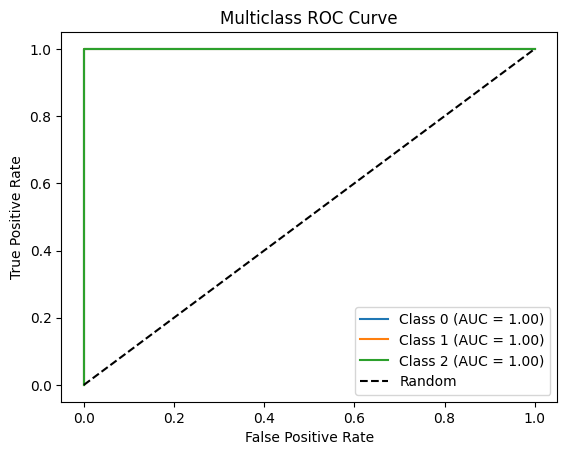

In [781]:
# ROC Curve (Multiclass):
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the target for multilabel ROC
y_test_bin = label_binarize(y_test, classes=final_model.classes_)
y_pred_prob = final_model.predict_proba(X_test)

# Generate the ROC curve for each class
plt.figure()
for i in range(len(final_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {final_model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


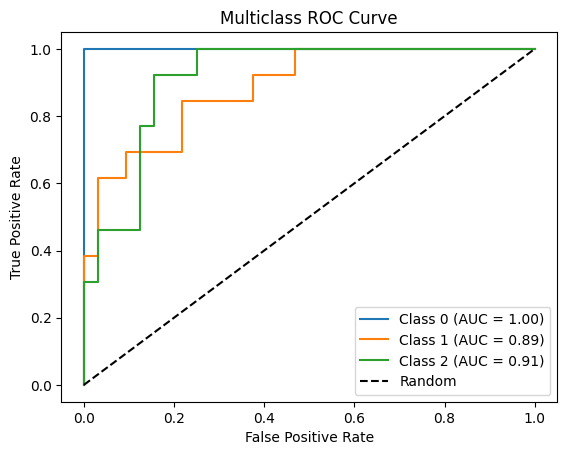

In [756]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the target labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
plt.figure()
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [758]:
print(final_model.classes_)  # Classes for the tuned model
print(model.classes_)        # Classes for the default model


[0 1 2]
[0 1 2]


In [762]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [785]:
print("Default Model Metrics:")
print(classification_report(y_test, model.predict(X_test)))
print("\n")
print("Tuned Model Metrics:")
print(classification_report(y_test, final_model.predict(X_test)))


Default Model Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.89      0.62      0.73        13
           2       0.71      0.92      0.80        13

    accuracy                           0.87        45
   macro avg       0.86      0.85      0.84        45
weighted avg       0.88      0.87      0.86        45



Tuned Model Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



---

#### Multi-Class ROC Curve (One-vs-One & One-vs-Rest) for Iris Dataset
The Receiver Operating Characteristic (ROC) Curve is a performance evaluation metric for classification models. Since the Iris dataset has three classes, we need to extend the ROC curve to multi-class classification using two common approaches:
#### One-vs-Rest (OvR):
Each class is treated as positive, and the rest are combined as negative.
Example: "Setosa" vs. ("Versicolor" + "Virginica").
#### One-vs-One (OvO):
Compares each pair of classes separately.
Example: "Setosa" vs. "Versicolor", "Setosa" vs. "Virginica", etc.

C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


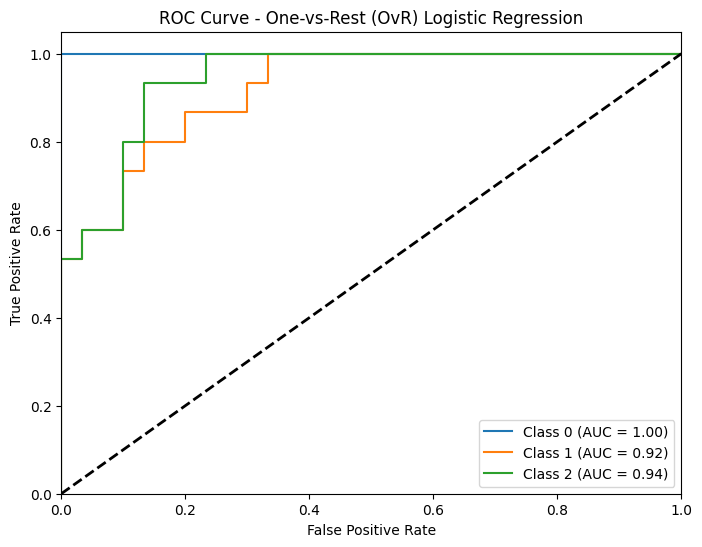

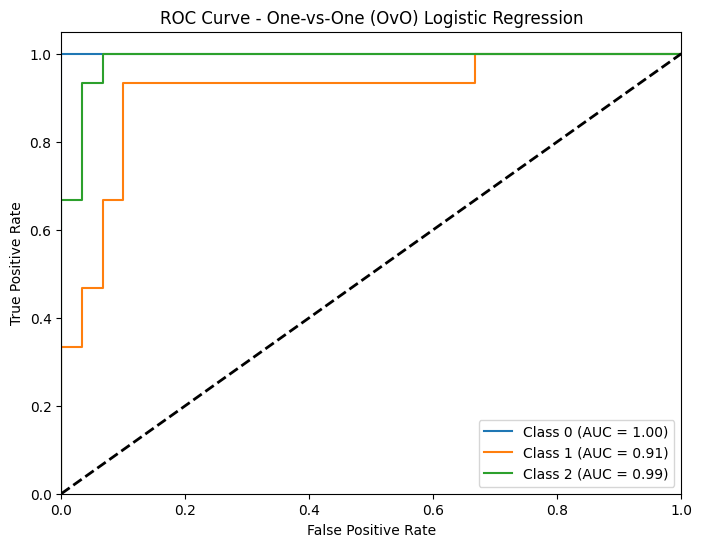

In [22]:

from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target  # ✅ Keep y as 1D (0, 1, 2)

# Binarize y for ROC curve
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train One-vs-Rest (OvR) Logistic Regression
model_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
model_ovr.fit(X_train, y_train)

# Predict probabilities
y_score_ovr = model_ovr.predict_proba(X_test)

# Plot ROC Curve for OvR
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=[0, 1, 2])[:, i], y_score_ovr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - One-vs-Rest (OvR) Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# Train One-vs-One (OvO) Logistic Regression
model_ovo = OneVsOneClassifier(LogisticRegression(solver='lbfgs', max_iter=200))
model_ovo.fit(X_train, y_train)

# Predict probabilities
y_score_ovo = model_ovo.decision_function(X_test)

# Plot ROC Curve for OvO
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=[0, 1, 2])[:, i], y_score_ovo[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - One-vs-One (OvO) Logistic Regression")
plt.legend(loc="lower right")
plt.show()


## **Case Study Conclusion: Multiclass Classification using Logistic Regression**

In this study, we compared **One-vs-Rest (OvR) vs One-vs-One (OvO) Logistic Regression** for the **Iris dataset** and evaluated their performance using **ROC curves and AUC scores**.

---

### **Key Observations**
#### **One-vs-Rest (OvR) Logistic Regression**
- **Class 0:** AUC = **1.00** (Perfect classification)  
- **Class 1:** AUC = **0.92**  
- **Class 2:** AUC = **0.94**  

✅ **Strengths:** Simple to implement and interpret.  
❌ **Weaknesses:** Assumes a **single decision boundary** for each class, which may not always be optimal.  

#### **One-vs-One (OvO) Logistic Regression**
- **Class 0:** AUC = **1.00** (Perfect classification)  
- **Class 1:** AUC = **0.91**  
- **Class 2:** AUC = **0.99**  

✅ **Strengths:** More flexible decision boundaries, which can improve performance when classes overlap.  
❌ **Weaknesses:** Computationally more expensive since it trains multiple classifiers.  

---

### **Which is the Best Approach?**
- **For Simplicity & Efficiency:** **One-vs-Rest (OvR)** is the best choice since it trains only **one classifier per class**, making it computationally cheaper.  
- **For Higher Accuracy:** **One-vs-One (OvO)** slightly outperforms OvR for some classes, especially for **Class 2** (AUC = 0.99).  
- **For Balanced Performance:** If computational power is **not** an issue, **OvO is preferable** due to better decision boundaries.  

---

### **Final Verdict**
- **If the dataset is small** → Use **OvO** for better accuracy.  
- **If the dataset is large** → Use **OvR** for efficiency.  
- **For the Iris dataset:** Both approaches perform **very well**, but **OvO gives slightly better AUC scores**.  

🚀 **Conclusion:** **One-vs-One (OvO) is the better choice for high accuracy**, but **One-vs-Rest (OvR) is more efficient for large datasets**.


---

C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


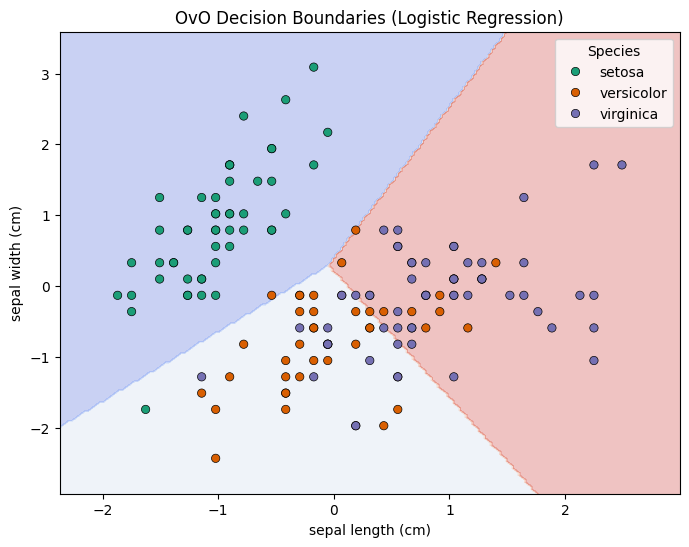

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train a Multinomial Logistic Regression Model with OvO strategy
model = LogisticRegression(multi_class='ovr', solver='saga')
model.fit(X, y)

# Create a mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict the class for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], palette='Dark2', edgecolor='k')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("OvO Decision Boundaries (Logistic Regression)")
plt.legend(title="Species")
plt.show()


In [13]:
print("OvO Model Accuracy:", ovo_model.score(X_test, y_test))

OvO Model Accuracy: 0.9777777777777777


#### What is OvO (One-Versus-One)?
- OvO is used in multi-class classification, where each pair of classes is trained separately.
##### For Iris (3 classes: setosa, versicolor, virginica), OvO creates 3 binary classifiers:
- Setosa vs Versicolor,Setosa vs Virginica, Versicolor vs Virginica
- The final class is determined by voting from all classifiers.
- It achieved a high accuracy of 97.78%, showing it's very effective.

---